In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_path = "15min-ETH-s9p1-20250109-TGT024_SONGKA_2K.csv"

data = pd.read_csv(file_path, header = 1)

# data.to_csv('rmon.csv', index = False)

In [20]:
data.head()

,Time Stamp,RX Octs,TX Octs,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,Status.1,RX Fragments,...,TX Queue7 Discard,SFP RX Power (MIN) [dBm],Status.6,SFP TX Power (MIN) [dBm],Status.7,Record Status,RX Peak Rate [Mbps],TX Peak Rate [Mbps],RX Peak Detect Time,TX Peak Detect Time
0,00:15,35957387086,5118869298,32454546,15176990,0,NORMAL,0,NORMAL,0,...,0,-7.9,NORMAL,-4.5,NORMAL,VALID,426,65,00:02:10,00:01:50
1,00:30,30717844638,4134174053,28350362,13331640,0,NORMAL,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,352,49,00:20:50,00:17:10
2,00:45,26378510855,3723006545,24734399,12025251,0,NORMAL,0,NORMAL,0,...,0,-7.7,NORMAL,-4.5,NORMAL,VALID,303,43,00:39:30,00:39:50
3,01:00,23706059116,3317867739,22406009,10927996,0,NORMAL,0,NORMAL,0,...,0,-7.7,NORMAL,-4.5,NORMAL,VALID,273,42,00:57:20,00:51:50
4,01:15,21197585693,2933775737,20292329,9911028,0,NORMAL,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,284,32,01:02:30,01:09:40


In [21]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [22]:
# data

In [23]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [24]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.


In [25]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [26]:
# data

In [27]:
# data.dtypes


In [28]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

In [29]:
data

,Time Stamp,RX Octs,TX Octs,RX Mbps,TX Mbps,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,...,TX Queue7 Discard,SFP RX Power (MIN) [dBm],Status.6,SFP TX Power (MIN) [dBm],Status.7,Record Status,RX Peak Rate [Mbps],TX Peak Rate [Mbps],RX Peak Detect Time,TX Peak Detect Time
0,00:15,3.595739e+10,5.118869e+09,319.621219,45.501060,32454546,15176990,0,NORMAL,0,...,0,-7.9,NORMAL,-4.5,NORMAL,VALID,426,65,00:02:10,00:01:50
1,00:30,3.071784e+10,4.134174e+09,273.047508,36.748214,28350362,13331640,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,352,49,00:20:50,00:17:10
2,00:45,2.637851e+10,3.723007e+09,234.475652,33.093392,24734399,12025251,0,NORMAL,0,...,0,-7.7,NORMAL,-4.5,NORMAL,VALID,303,43,00:39:30,00:39:50
3,01:00,2.370606e+10,3.317868e+09,210.720525,29.492158,22406009,10927996,0,NORMAL,0,...,0,-7.7,NORMAL,-4.5,NORMAL,VALID,273,42,00:57:20,00:51:50
4,01:15,2.119759e+10,2.933776e+09,188.422984,26.078007,20292329,9911028,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,284,32,01:02:30,01:09:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23:00,6.124041e+10,7.742582e+09,544.359207,68.822952,55148463,24790872,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,632,86,22:54:20,22:54:00
92,23:15,6.000570e+10,7.744799e+09,533.384038,68.842659,53926849,24055682,0,NORMAL,0,...,0,-7.8,NORMAL,-4.5,NORMAL,VALID,676,88,23:06:20,23:02:30
93,23:30,5.106851e+10,7.282704e+09,453.942342,64.735147,46049380,21348588,0,NORMAL,0,...,0,-7.9,NORMAL,-4.5,NORMAL,VALID,571,75,23:15:10,23:20:40
94,23:45,4.651297e+10,6.026354e+09,413.448593,53.567594,42476603,19284647,0,NORMAL,0,...,0,-8.0,NORMAL,-4.5,NORMAL,VALID,564,65,23:32:50,23:30:40


In [30]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M')

# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

In [31]:
# data.dtypes

In [32]:
# data

In [33]:
data = data.drop(index=95)

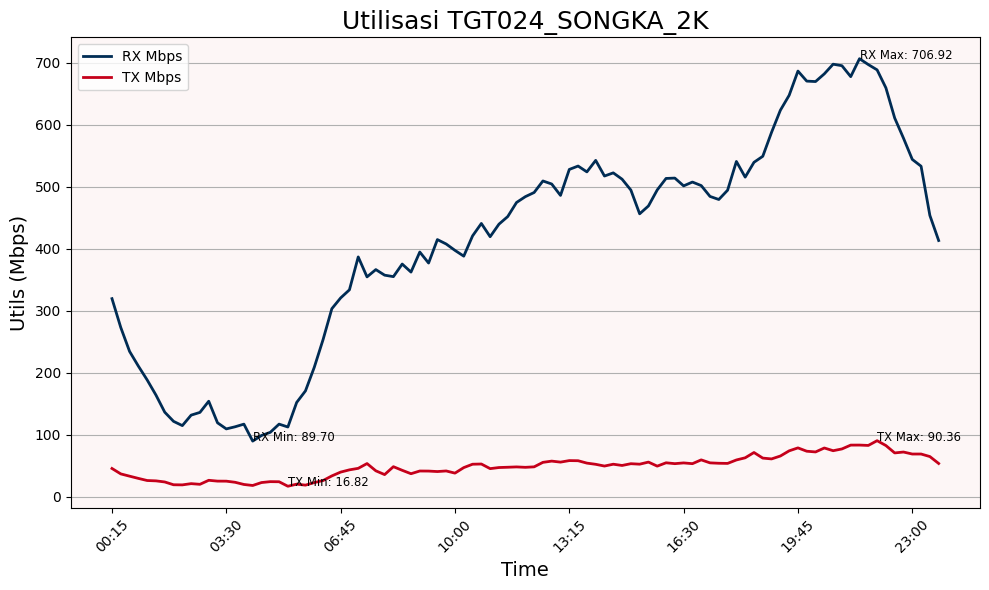

In [34]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('#FDF6F6')

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='#002C54', linestyle='-', linewidth=2)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='#C5001A', linestyle='-', linewidth=2)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 18)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Utils (Mbps)', fontsize=14)

# Menambahkan legenda
plt.legend()

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()
max_tx = data['TX Mbps'].max()
min_tx = data['TX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]
highest_tx = data.loc[data['TX Mbps'] == max_tx]
lowest_tx = data.loc[data['TX Mbps'] == min_tx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"RX Max: {row['RX Mbps']:.2f}", color='black', fontsize='small', ha='left')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"RX Min: {row['RX Mbps']:.2f}", color='black', fontsize='small', ha='left')

for idx, row in highest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"TX Max: {row['TX Mbps']:.2f}", color='black', fontsize='small', ha='left')

for idx, row in lowest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"TX Min: {row['TX Mbps']:.2f}", color='black', fontsize='small', ha='left')

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::13], rotation=45)
plt.tight_layout()
plt.show()